In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
import numpy as np


In [38]:
loan_df = pd.read_csv("loan_train_sampled.csv")
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,pub_rec_bankruptcies,loan_status
0,6000,6000,6000.00000,36 months,10.59,B,B2,10,MORTGAGE,130000.0,...,751.93,0.0,0.0,0.0,Jan-13,3441.52,May-13,0,0,Fully Paid
1,14000,14000,13991.39746,36 months,19.82,G,G1,4,RENT,40000.0,...,4686.01,0.0,0.0,0.0,Jan-13,554.99,Dec-15,0,0,Fully Paid
2,15000,15000,14700.00000,36 months,11.14,B,B1,7,RENT,36700.0,...,1979.51,0.0,0.0,0.0,Mar-11,8616.51,May-16,0,0,Fully Paid
3,8000,8000,7775.00000,36 months,7.14,A,A3,10,RENT,126252.0,...,384.99,0.0,0.0,0.0,Apr-11,6409.52,Mar-16,0,0,Fully Paid
4,20500,12625,12625.00000,60 months,20.89,F,F1,9,MORTGAGE,54000.0,...,7502.09,0.0,0.0,0.0,Mar-16,88.58,Mar-16,0,0,Fully Paid


In [39]:
loan_df.shape

(16780, 39)

In [40]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16780 entries, 0 to 16779
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   16780 non-null  int64  
 1   funded_amnt                 16780 non-null  int64  
 2   funded_amnt_inv             16780 non-null  float64
 3   term                        16780 non-null  object 
 4   int_rate                    16780 non-null  float64
 5   grade                       16780 non-null  object 
 6   sub_grade                   16780 non-null  object 
 7   emp_length                  16780 non-null  int64  
 8   home_ownership              16780 non-null  object 
 9   annual_inc                  16780 non-null  float64
 10  verification_status         16780 non-null  object 
 11  issue_d                     16780 non-null  object 
 12  purpose                     16780 non-null  object 
 13  title                       167

In [41]:
loan_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,16780.0,11097.749106,7273.057226,1000.00,5400.000000,9800.000000,15000.000000,35000.000000
funded_amnt,16780.0,10838.647735,7016.709581,1000.00,5325.000000,9600.000000,15000.000000,35000.000000
funded_amnt_inv,16780.0,10362.358440,6925.787448,0.00,5000.000000,8950.000000,14374.713900,35000.000000
int_rate,16780.0,12.521789,3.647799,5.42,10.000000,12.530000,15.050000,24.400000
emp_length,16780.0,5.036234,3.286796,1.00,2.000000,4.000000,8.000000,10.000000
annual_inc,16780.0,60282.821036,27316.525010,4000.00,40000.000000,55000.000000,76000.000000,141996.000000
dti,16780.0,13.795358,6.387046,0.00,9.030000,14.010000,18.820000,29.930000
delinq_2yrs,16780.0,0.130989,0.458160,0.00,0.000000,0.000000,0.000000,9.000000
inq_last_6mths,16780.0,0.838915,1.023113,0.00,0.000000,1.000000,1.000000,8.000000
open_acc,16780.0,9.090465,4.212095,2.00,6.000000,8.000000,11.000000,39.000000


In [42]:
loan_df.isnull().sum()


loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
purpose                       0
title                         0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveri

In [43]:
loan_fully_paid = sum(loan_df["loan_status"] == "Fully Paid")/len(loan_df)
loan_charged_off = sum(loan_df["loan_status"] == "Charged Off")/len(loan_df)

In [44]:
loan_fully_paid

0.5988081048867699

In [45]:
loan_charged_off

0.40119189511323006

In [46]:
loan_fullypaid = loan_df[loan_df['loan_status'] == "Fully Paid"].copy()
loan_chargedoff = loan_df[loan_df['loan_status'] == "Charged Off"].copy()

<ipython-input-47-2346aa339c2a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_fullypaid["loan_amnt"], label='Fully Paid')
<ipython-input-47-2346aa339c2a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_chargedoff["loan_amnt"], label='Charged Off')


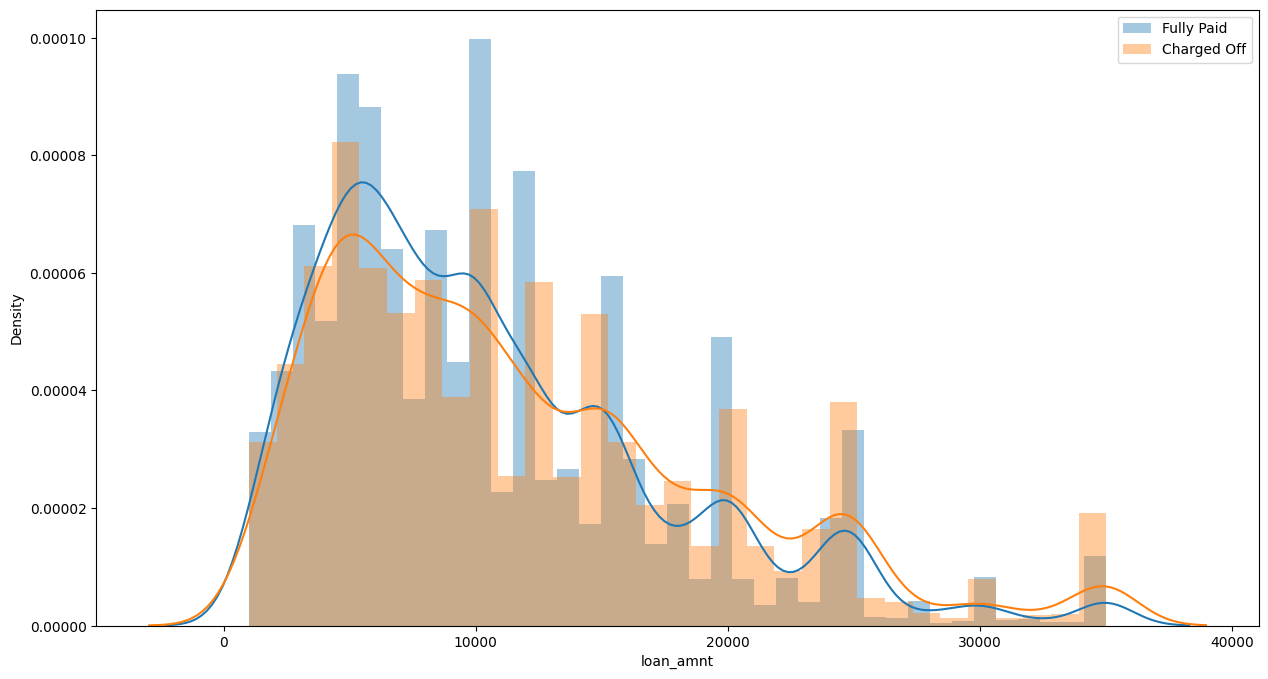

In [47]:
plt.figure(figsize=(15,8))
sns.distplot(loan_fullypaid["loan_amnt"], label='Fully Paid')
sns.distplot(loan_chargedoff["loan_amnt"], label='Charged Off')
plt.legend()
plt.savefig('approved_not_approved.png', facecolor='w', bbox_inches='tight')
plt.show()


In [48]:
loan_df['term'] = loan_df['term'].str.replace('months', '', regex=True)

In [71]:
pd.get_dummies(loan_df['grade'])

,A,B,C,D,E,F,G
0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
16775,0,0,1,0,0,0,0
16776,0,0,1,0,0,0,0
16777,0,0,1,0,0,0,0
16778,0,0,1,0,0,0,0


In [73]:
pip install category_encoders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.7 MB/s eta 0:00:00


In [74]:
import category_encoders as ce


In [75]:
from tensorflow.keras.utils import to_categorical
Y = loan_df["loan_status"]

X = loan_df.drop(columns=["loan_status"])


In [115]:
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

encoder = ce.OrdinalEncoder(cols=categorical_columns)
X = encoder.fit_transform(X)

encoder_label = ce.OrdinalEncoder(cols=["loan_status"])
Y = encoder_label.fit_transform(Y)

In [116]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# y_train = sc.fit_transform(y_train)
# y_test = sc.transform(y_test)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15102, 38), (1678, 38), (15102, 1), (1678, 1))

In [117]:
# sequential model
ann_model = keras.Sequential()

# adding dense layer
ann_model.add(Dense(250, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(500, activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(500, activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(500, activation='relu'))
ann_model.add(Dropout(0.4))
ann_model.add(Dense(250, activation='linear'))
ann_model.add(Dropout(0.4))

# adding dense layer with sigmoid activation/output layer
ann_model.add(Dense(1, activation='sigmoid'))
ann_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 250)               9750      
                                                                 
 dropout_35 (Dropout)        (None, 250)               0         
                                                                 
 dense_43 (Dense)            (None, 500)               125500    
                                                                 
 dropout_36 (Dropout)        (None, 500)               0         
                                                                 
 dense_44 (Dense)            (None, 500)               250500    
                                                                 
 dropout_37 (Dropout)        (None, 500)               0         
                                                                 
 dense_45 (Dense)            (None, 500)              

In [118]:
# custom functions for f1, precision and recall

from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [119]:
ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[f1_m]) # metrics=['accuracy']


In [120]:
history = ann_model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=1)


Epoch 1/20
378/378 [==============================] - 10s 21ms/step - loss: -8869994376986624.0000 - f1_m: 0.9996 - val_loss: -77806777130811392.0000 - val_f1_m: 1.0000
Epoch 2/20
378/378 [==============================] - 7s 18ms/step - loss: -2191332446593613824.0000 - f1_m: 1.0000 - val_loss: -8468864617886515200.0000 - val_f1_m: 1.0000
Epoch 3/20
378/378 [==============================] - 8s 21ms/step - loss: -39034923381954707456.0000 - f1_m: 1.0000 - val_loss: -99486934694195363840.0000 - val_f1_m: 1.0000
Epoch 4/20
378/378 [==============================] - 7s 19ms/step - loss: -256028776798896521216.0000 - f1_m: 1.0000 - val_loss: -514801019827047628800.0000 - val_f1_m: 1.0000
Epoch 5/20
378/378 [==============================] - 7s 19ms/step - loss: -999081707929358827520.0000 - f1_m: 1.0000 - val_loss: -1734527338009564545024.0000 - val_f1_m: 1.0000
Epoch 6/20
378/378 [==============================] - 8s 21ms/step - loss: -2868257315754325573632.0000 - f1_m: 1.0000 - val_los

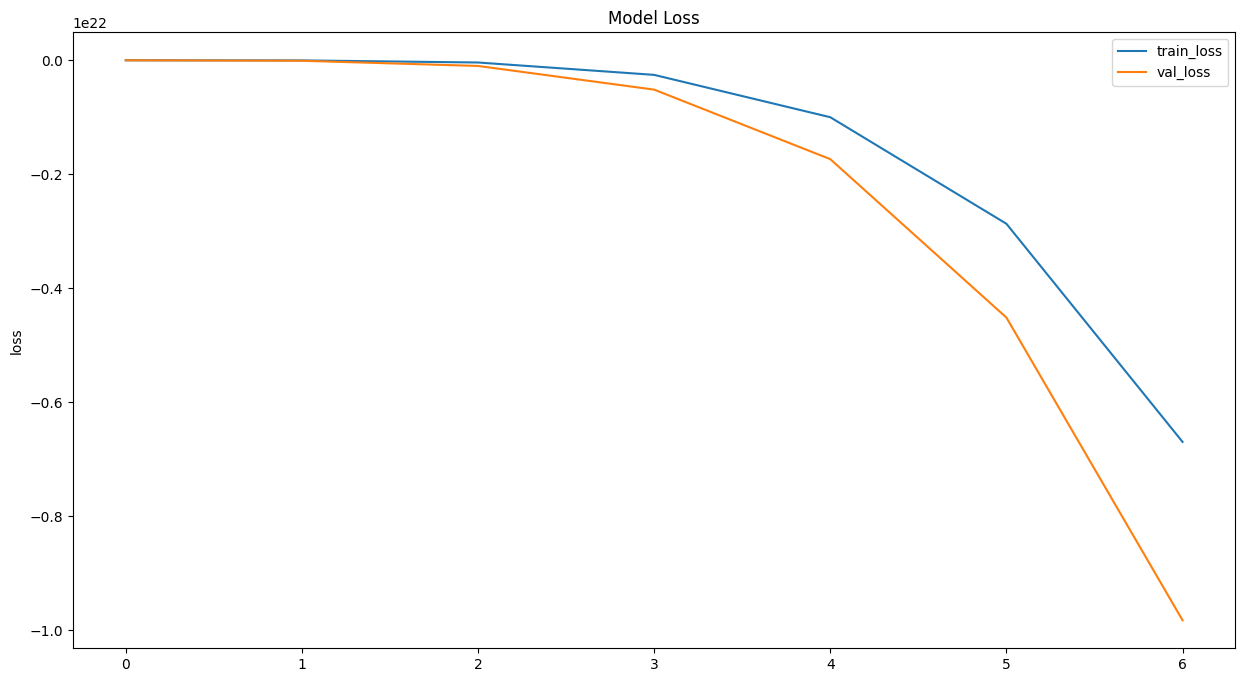

In [121]:
# Plot the model performance across epochs
plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.savefig('modelloss.png', facecolor='w', bbox_inches='tight')
plt.show()